# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about liquor purchasing orders.

This dataset can be found on kaggle at https://www.kaggle.com/residentmario/iowa-liquor-sales. 

In [2]:
import os
import time

import pandas as pd
from demo.liquor import load_sample
from featuretools.autonormalize import autonormalize as an

In [4]:
df = load_sample()
print("Rows: "+ str(df.shape[0]))
print("Columns: " + str(df.shape[1]))
df.head(3)

Rows: 1000
Columns: 12


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name
0,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7,Black Hawk,1701100,DECANTERS & SPECIALTY PACKAGES
1,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70,Muscatine,1701100,DECANTERS & SPECIALTY PACKAGES
2,S28866900001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47,Ida,1701100,DECANTERS & SPECIALTY PACKAGES


In [5]:
df.dtypes


Invoice/Item Number    object
Date                   object
Store Number            int64
Store Name             object
Address                object
City                   object
Zip Code               object
Store Location         object
County Number           int64
County                 object
Category                int64
Category Name          object
dtype: object

In [6]:
df = df.astype({"County Number": 'int64', "Category": 'int64'})

We load our data into a pandas dataframe. For the purpose of manageability we keep the first 13 columns and 1000 rows

In [7]:
start = time.time()
entityset = an.auto_entityset(df, accuracy=0.96, name='liquor orders')
time.time() - start

100%|██████████| 11/11 [00:08<00:00,  1.32it/s]


17.265804052352905

To detect the dependencies, normalize the data and create an entity set all at once, all we need to do is call an.auto_entityset(). We pass 96% as the desired accuracy, and 'liquor orders" as the desired name for our entity set. This takes around around 10 seconds for 1000 rows and around 10 minutes for 1.5 million rows

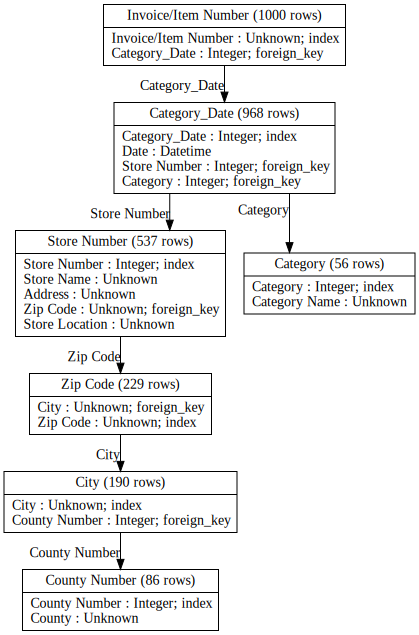

In [8]:
entityset.plot()

Above you can see plotted the entities within entityset, and the relationships between them. Each entity contains the data from the original df with duplication removed. 

In [9]:
entityset

Entityset: liquor orders
  DataFrames:
    Invoice/Item Number [Rows: 1000, Columns: 2]
    Category_Date [Rows: 968, Columns: 4]
    Store Number [Rows: 537, Columns: 5]
    Zip Code [Rows: 229, Columns: 2]
    City [Rows: 190, Columns: 2]
    County Number [Rows: 86, Columns: 2]
    Category [Rows: 56, Columns: 2]
  Relationships:
    Invoice/Item Number.Category_Date -> Category_Date.Category_Date
    Category_Date.Category -> Category.Category
    Category_Date.Store Number -> Store Number.Store Number
    Store Number.Zip Code -> Zip Code.Zip Code
    Zip Code.City -> City.City
    City.County Number -> County Number.County Number